# Домашнее задание 1 "Оценки и доверительные интервалы"

In [1]:
from scipy import optimize 
from scipy import stats 
import matplotlib.pyplot as plt
import numpy as np

Number_in_list = 10

## Задача 1

Видимо, под распределением U(-$\theta$, $\theta$) понимается $p(x) = \dfrac{1} {2 \theta} \{x \in \ (-\theta, \theta)\}$

\begin{align}
f(X_1,...,X_n \theta) = \prod\limits_{i=1}^{n} \dfrac{1} {2 \theta} &=
\left\{
\begin{aligned}
&(\dfrac{1} {2 \theta})^n, &\forall i X_i \in (-\theta, \theta),& \text{ или } \theta > \max(|X_1|, ..., |X_n|)\\
&0 , &\exists i, X_i \notin (-\theta, \theta)
\end{aligned}
\right. \\
\end{align}
	
    
Максимум функции достигается при минимально возможном $\theta$, при котором функция не равна нулю

$\hat \theta = argmax_{\theta}(f(X_1, ..., X_n,\theta)) = \max(|X_1|, ..., |X_n|)$

$\theta \rightarrow 0$

In [2]:
Nsize = 10000

def uniform_sample(theta_):
    return (np.random.rand(Nsize) - 0.5) * 2 * theta_

def sum_uniform_minus_log(theta_):
    samp = uniform_sample(theta_)
    if (theta_ > np.max(np.abs(samp))):
        return - len(samp) * np.log(1 / 2 / theta_)
    else:
        return 0


In [3]:
res = optimize.minimize(sum_uniform_minus_log, 0.2) 

res

      fun: array([-9162.90731874])
 hess_inv: array([[1]])
      jac: array([49999.99816895])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 331
      nit: 0
     njev: 109
   status: 2
  success: False
        x: array([0.2])

In [4]:
res = optimize.minimize(sum_uniform_minus_log, 0.2, method='Nelder-Mead', bounds = optimize.Bounds(0,100000)) # 

res

c:\dev\python372\lib\site-packages\scipy\optimize\_minimize.py:517: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


 final_simplex: (array([[7.33394123e-31],
       [2.59227336e-28]]), array([-686944.77646243, -628267.00189134]))
           fun: -686944.7764624268
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 200
           nit: 100
        status: 1
       success: False
             x: array([7.33394123e-31])

## Задача 2 (Метод выбора с отклонением)

Итак, $X$ распределена как $F$ с плотностью $f(x)$, $Y$ распределена как $G$ с плотностью $g(x)$

$P(U \leq \dfrac{f(Y)}{cg(Y)}| Y=y) = \dfrac{f(y)}{cg(y)}$

$p = \int\limits_{-\infty}^{+\infty}\dfrac{f(y)}{cg(y)}\times g(y) dy = \dfrac{1}{c}\int\limits_{-\infty}^{+\infty}f(y)dy = \dfrac{1}{c}$

Константа $с$, как видим, должна лежать в диапазоне от 1 до $+\infty$. Наиболее оптимальное значение для этой константы $c = \sup_x\bigg(\dfrac{f(x)}{g(x)}\bigg)$

Пусть $B = \{U \leq \dfrac{f(Y)}{cg(Y)}\}$, $A = \{Y \leq y\}$, $P(B) = p = 1/c$


По формуле Байеса

$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)} = \dfrac{P(AB)}{P(B)}$

$P(U \leq \dfrac{f(Y)}{cg(Y)}|Y\leq y) = \dfrac{P(U \leq \dfrac{f(Y)}{cg(Y)},Y\leq y) }{G(y)} = \int\limits_{-\infty}^{y}\dfrac{P(U\leq \dfrac{f(y)}{cg(y)}|Y = \omega\leq y)}{G(y)}g(\omega)d\omega=\dfrac{1}{G(y)}\int\limits_{-\infty}^{y}\dfrac{f(\omega)}{cg(\omega)}g(\omega)d\omega = \dfrac{1}{G(y)}\int_{-\infty}^{y}f(\omega)d\omega=\dfrac{F(y)}{cG(y)}$



$P(U \leq \dfrac{f(Y)}{cg(Y)}| Y \leq y) \times \dfrac{G(y)}{1/c} = \dfrac{F(y)}{cG(y)}\times\dfrac{G(y)}{1/c}=F(y)$

## Задача 3

Имеются: бесконечная выборка $X = (X_1,X_2,...)$, распределение $Beta(\alpha,\beta)$, $\alpha =$, $\beta = 50 - \alpha = $

$p(x) = \dfrac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)} = \dfrac{x^{\alpha-1}(1-x)^{\beta-1}}{\int\limits_{0}^{1}x^{\alpha-1}(1-x)^{\beta-1}dx}$

Статистика $T_n = \dfrac{\sum_{}^{}X_i - nEX_1}{\sqrt{nDX_1}}$

In [8]:
def T_n(data_, a_beta_, b_beta_):
    a = 1.0 * np.array(data_)
    n = len(a)
    return (np.sum(a) - n * stats.beta.mean(a_beta_, b_beta_))/(np.sqrt(n)* stats.beta.std(a_beta_, b_beta_))



In [9]:
a_beta = Number_in_list
b_beta = 50 - a_beta

In [11]:
Nsize = 10000
r = stats.beta.rvs(a_beta, b_beta, size=Nsize)
    
Narray = np.arange(1,Nsize,1)
T_nArray = []
for n in Narray:
    T_nArray.append(T_n(r[1:n], a_beta, b_beta))


c:\dev\python372\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


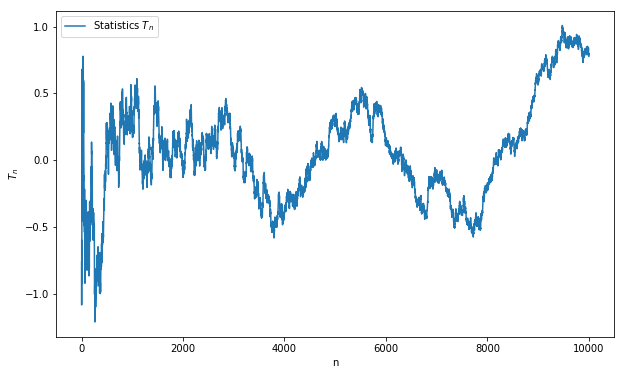

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(Narray, T_nArray,label="Statistics $T_n$")
plt.xlabel("n")
plt.ylabel("$T_n$")
plt.legend()
plt.show()

## Задача 4

Имеются: выборка $(X_1, ..., X_{100})$, распределение Парето $\alpha > 0 $

$p(x)=\dfrac{\alpha}{x^{\alpha+1}}$, $x > 1$

In [13]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [14]:
alphaArray = np.arange(0.1, 0.5, 0.01)
leftArray = []
rightArray = []

for alpha in alphaArray:
    r = stats.pareto.rvs(alpha, size=100)
    left,right = mean_confidence_interval(r)
    leftArray.append(left)
    rightArray.append(right)

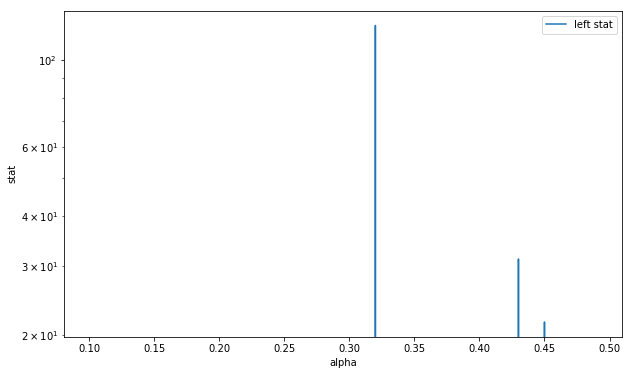

In [15]:
plt.figure(figsize=(10, 6))

plt.semilogy(alphaArray, leftArray,label="left stat")
plt.xlabel("alpha")
plt.ylabel("stat")
plt.legend()
plt.show()

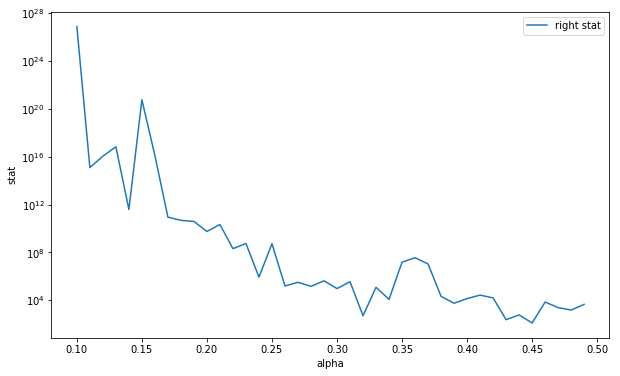

In [16]:
plt.figure(figsize=(10, 6))

plt.semilogy(alphaArray, rightArray, label= "right stat")
plt.xlabel("alpha")
plt.ylabel("stat")
plt.legend()
plt.show()

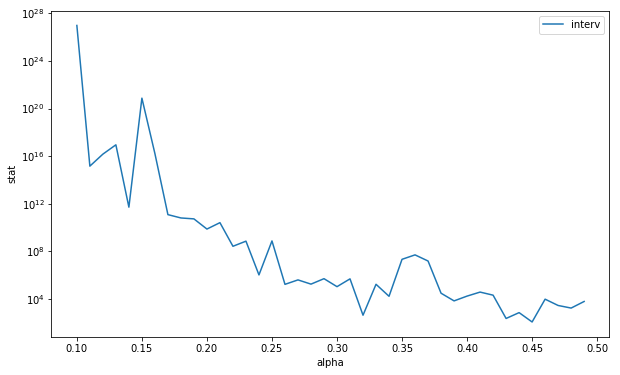

In [17]:
plt.figure(figsize=(10, 6))

plt.semilogy(alphaArray, np.array(rightArray) - np.array(leftArray), label= "interv")
plt.xlabel("alpha")
plt.ylabel("stat")
plt.legend()
plt.show()

## Задача 5

Имеются: распределение Вейбулла, $x > 0$, $\alpha,\beta > 0$

$F(x) = 1 - \exp(-(\beta x)^\alpha)$

In [18]:
a_beta = Number_in_list
b_beta = 50 - a_beta
Nsize = 10000

def f_rev_weib(x, a_beta_, b_beta_):
    return np.power((- np.log(1 - x)) / np.power(b_beta_, a_beta_), 1/a_beta_)

def f_weib(x, a_beta_, b_beta_):
    return 1 - np.exp(-np.power(b_beta_ * x, a_beta_))

def sum_ln_D(a_beta_, b_beta_):
    samples_weib = f_rev_weib(np.random.rand(Nsize), a_beta, b_beta)
    F1 = 0
    F2 = 0
    summa = 0
    i = 0
    while i < Nsize:
        if (i != 1):
            F1 = F2
            F2 = f_weib(samples_weib[i], a_beta_, b_beta_)
        summa = summa + np.log(F2 - F1)
        i = i+1
    return summa

def minus_summa_ln_D(x):
    return sum_ln_D(x[0], x[1])

In [19]:
res = optimize.minimize(minus_summa_ln_D, [a_beta, b_beta]) 
#res = optimize.minimize(minus_summa_ln_D, [1, 49]) 
res

        

c:\dev\python372\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
c:\dev\python372\lib\site-packages\scipy\optimize\optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


      fun: -inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([10., 40.])

In [20]:
plt.hist(samples_weib, bins = 100)

NameError: name 'samples_weib' is not defined